## Bitcoin Price Analysis – Curated Data

This analysis focuses on understanding short-term price behavior and volatility
in Bitcoin using curated historical data. The emphasis is on exploratory analysis
and simple financial metrics rather than predictive modeling.

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


pd.set_option("display.max_columns",None)

In [55]:
df = pd.read_parquet("../data/bitcoin_prices_daily.parquet")
df.head()

,trade_date,price_usd
0,2025-12-05,88838.812570
1,2025-12-05,89320.673300
2,2025-12-05,88971.137009
3,2025-12-05,89661.009756
4,2025-12-05,89319.186281


In [ ]:
# Sorting is required here, otherwise rolling metrics may be misleading
df = df.sort_values("trade_date").reset_index(drop=True)

In [57]:
df["price_usd"].describe()

count      721.000000
mean     88859.207299
std       1704.187357
min      84581.283372
25%      87568.193060
50%      88477.298924
75%      90056.960294
max      94267.183294
Name: price_usd, dtype: float64

In [58]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   trade_date  721 non-null    object 
 1   price_usd   721 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.4+ KB


In [59]:
df["daily_return_pct"] = df["price_usd"].pct_change() * 100
df[["trade_date","daily_return_pct"]].head()

,trade_date,daily_return_pct
0,2025-12-05,NaN
1,2025-12-05,0.542399
2,2025-12-05,-0.391327
3,2025-12-05,0.775389
4,2025-12-05,-0.381240


Daily returns were used instead of absolute price differences to make
volatility comparable across different price levels.

In [60]:
df["ma_7"] = df["price_usd"].rolling(window=7).mean()

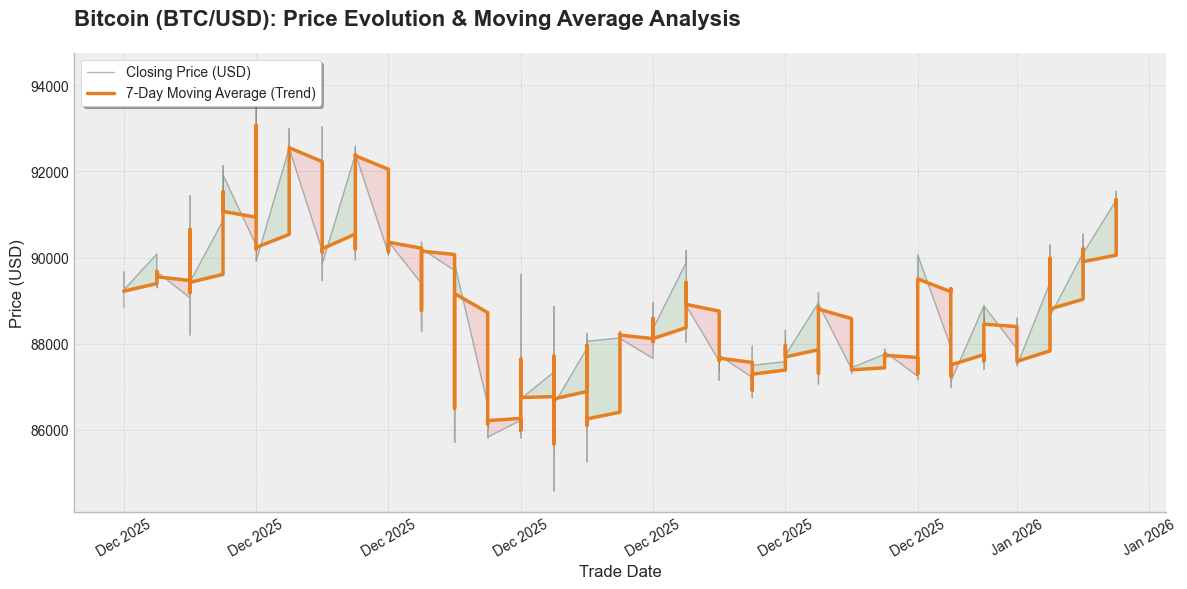

In [70]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 1. Style and Figure Configuration
plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(12, 6), dpi=100)

# 2. Plotting: Raw Data (Closing Price) and Analysis (Moving Average)
# We use a neutral color for the price and a vibrant one for the trend (MA)
ax.plot(df["trade_date"], df["price_usd"], 
        label="Closing Price (USD)", 
        color='#7f8c8d', linewidth=1, alpha=0.6)

ax.plot(df["trade_date"], df["ma_7"], 
        label="7-Day Moving Average (Trend)", 
        color='#e67e22', linewidth=2.5)

# 3. Technical Highlight: Price vs. MA Spread
# Filling green when price is above MA (Bullish sentiment) 
# and red when below (Bearish sentiment)
ax.fill_between(df["trade_date"], df["price_usd"], df["ma_7"], 
                where=(df["price_usd"] >= df["ma_7"]),
                color='green', alpha=0.1, interpolate=True)

ax.fill_between(df["trade_date"], df["price_usd"], df["ma_7"], 
                where=(df["price_usd"] < df["ma_7"]),
                color='red', alpha=0.1, interpolate=True)

# 4. Axes and Title Customization
ax.set_title("Bitcoin (BTC/USD): Price Evolution & Moving Average Analysis", 
             fontsize=16, fontweight='bold', pad=20, loc='left')
ax.set_ylabel("Price (USD)", fontsize=12)
ax.set_xlabel("Trade Date", fontsize=12)

# 5. Smart Date Formatting (Avoids overlapping)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=30, fontsize=10)

# 6. Final Polish (Despine and Legend)
ax.grid(True, linestyle='--', alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(loc='upper left', frameon=True, facecolor='white', shadow=True)

plt.tight_layout()
plt.show()

In [62]:
df["volatility_7d"] = df["daily_return_pct"].rolling(window=7).std()

Rolling volatility was calculated to observe changes in market risk over time.

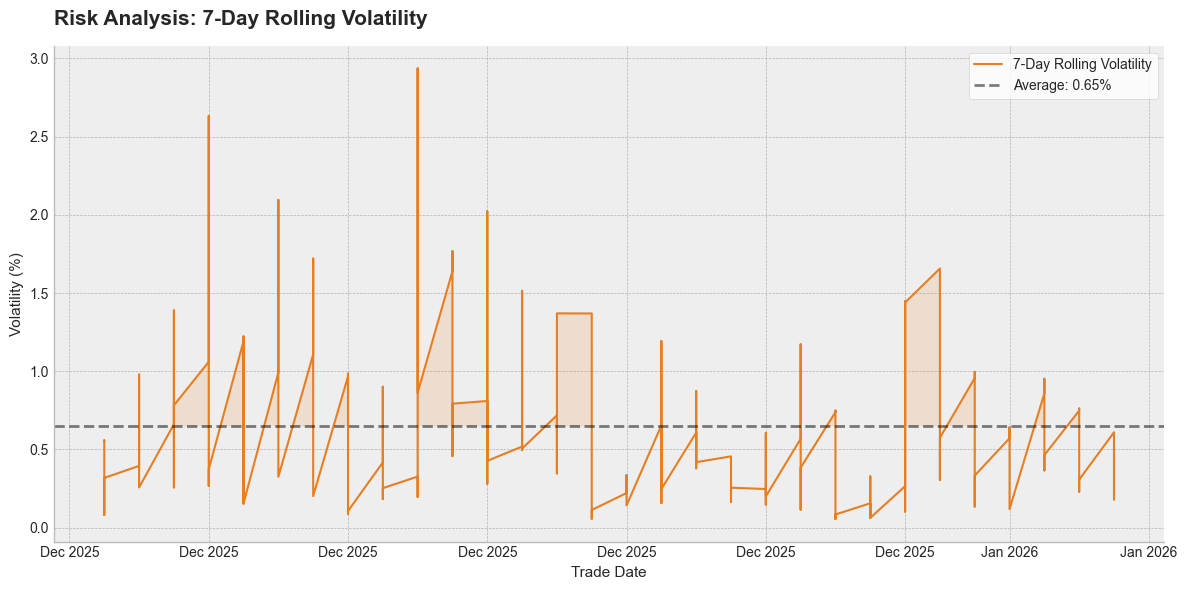

In [69]:
# 1. Style and Figure Setup
plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(12, 6), dpi=100)

# 2. Plotting the Volatility Line
ax.plot(df["trade_date"], df["volatility_7d"], 
        color="#e67e22", linewidth=1.5, label="7-Day Rolling Volatility")

# 3. Adding Historical Average (Mean)
mean_vol = df["volatility_7d"].mean()
ax.axhline(mean_vol, color="black", linestyle="--", alpha=0.5, 
           label=f"Average: {mean_vol:.2f}%")

# 4. Highlight High Risk Periods (Above Average)
ax.fill_between(df["trade_date"], df["volatility_7d"], mean_vol, 
                where=(df["volatility_7d"] > mean_vol),
                color="#e67e22", alpha=0.15, interpolate=True)

# 5. Titles and Labels in English
ax.set_title("Risk Analysis: 7-Day Rolling Volatility", 
             fontsize=15, fontweight='bold', loc='left', pad=15)
ax.set_ylabel("Volatility (%)", fontsize=11)
ax.set_xlabel("Trade Date", fontsize=11)

# 6. Date Formatting
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=0) 

# 7. Chart Cleanup
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc="upper right", frameon=True, facecolor="white")

plt.tight_layout()
plt.show()

From a short-term perspective, price movements are clearly volatile.
Using a rolling average helps visualize local trends, but it also
highlights how quickly momentum can change in this market.